## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Paths

In [2]:
TRAIN = '../Data/df_train.csv'
TEST = '../Data/df_test.csv'

## Functions

In [3]:
z_score = lambda x : (x-np.mean(x,axis=0))/ np.std(x,axis=0) #code from exercise 5

## Variables and df loading

In [4]:
col = 'tab10' #colour theme

df = pd.read_csv(TRAIN) #training dataframe

attributes = list(df.columns)[:-1] #creates list of column names for later

X = df[attributes].copy() #attributes
y = df['type'].copy() #true values

y_types = {1:'wind_float', 2:'wind_non', 3:'wind_veh', 5:'container', 6:'tableware', 7:'headlamp'}
y_list = y.unique() #'y' values

X_std = z_score(X) #standardizes X as later we see they are on different scales

for i in y_list: #this changes the 'type' to a descriptive word rather than a number
    #This is more human readable for plotting later - 'y' is still using the numbers
    df['type'][df['type'] == i] = y_types[i]

<ipython-input-4-3bb2aecc6c37>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'][df['type'] == i] = y_types[i]


In [57]:
def Gini(df, y,threshold):
    df = pd.concat([df,y], axis=1,)
    df.columns=['Att', 'class']
    #print(df.head())
    '''Takes a threshold and calc the Gini impurity of each split of the given df and class'''
    df_a = df[df['Att'] < threshold] #check what the accepted standard for the equals bit is
    df_b = df[df['Att'] >= threshold]
    '''calc and return gini impurity for each side'''
    #print(len(df_a))
    #print(len(df_b))
    gini_a = 0
    gini_b = 0
    
    for i in y_list:
        
        k_a = df_a[df_a['class'] == i]
        p_ka = len(k_a)/len(df)
        
        k_b = df_b[df_b['class'] == i]
        p_kb = len(k_b)/len(df)
        
        print(i, p_ka,p_kb)
        
        gini_a += (p_ka* (1-p_ka))
        gini_b += (p_kb* (1-p_kb))
        

    
    return ((len(df_a)/len(df))*gini_a) + ((len(df_b)/len(df))*gini_b)

        
        
Gini(df['Ba'],y, 0.4)

2 0.348993288590604 0.006711409395973154
1 0.3221476510067114 0.006711409395973154
5 0.053691275167785234 0.006711409395973154
7 0.013422818791946308 0.12080536912751678
6 0.040268456375838924 0.0
3 0.08053691275167785 0.0


0.5523936433119132

In [47]:
tmp = pd.concat([df['Ba'],y], axis=1,)
tmp.columns=['Att', 'class']

tmp = tmp[tmp['Att'] < 0.4]

for i in y_list:
    tmp_ = tmp[tmp['class'] == i]
    print(i,len(tmp_))


2 52
1 48
5 8
7 2
6 6
3 12


In [13]:
def leaf_hunter(df=df, class_list=y_list):
    '''takes df and class returns highest gini gain, best class, best threshold, and 
    best attribute'''
    #So many loops! 
    best_gini = 0
    best_class = ''
    best_threshold = ''
    best_att = ''

    for a in attributes:
        tmp = df.sort_values(by=a, axis=0).copy()
            #print(a)
            #loop through attributes
        for threshold in range(len(df)-1):
            '''loop through potential thresholds'''
            if tmp[a].iloc[threshold] == tmp[a].iloc[threshold+1]:
                pass
            else:
                thresh = ((tmp[a].iloc[threshold] + tmp[a].iloc[threshold+1])/2)
                #print((tmp[a].iloc[threshold], tmp[a].iloc[threshold+1]), thresh)       
                gini = Gini(df[a], y, thresh)
                if a == 'Ba':
                    print(gini, a, thresh)
                if gini > best_gini:
                    best_gini = gini
                    #best_class = cl
                    best_threshold = thresh
                    best_att = a
    return best_gini, best_threshold, best_att
            
best_gini, best_threshold, best_att = leaf_hunter()

print(best_gini, best_threshold, best_att)

0.7664519616233504 Ba 0.03
0.7624881762082789 Ba 0.075
0.7583442187288861 Ba 0.115
0.7540200891851719 Ba 0.14500000000000002
0.753029142831404 Ba 0.21000000000000002
0.7485248412233684 Ba 0.4
0.749876131705779 Ba 0.535
0.7510472501238683 Ba 0.55
0.7520381964776363 Ba 0.585
0.7528489707670827 Ba 0.625
0.7534795729922076 Ba 0.65
0.7539300031530112 Ba 0.675
0.7496058736092969 Ba 0.875
0.7498761317057789 Ba 1.125
0.7499662177379397 Ba 1.285
0.749876131705779 Ba 1.4649999999999999
0.7496058736092969 Ba 1.56
0.7485248412233683 Ba 1.58
0.7477140669339218 Ba 1.6099999999999999
0.7467231205801541 Ba 1.65
0.7455520021620647 Ba 1.6749999999999998
0.7442007116796541 Ba 1.6949999999999998
0.7426692491329219 Ba 1.955
0.7419485608756362 Ba 2.54
0.7402369262645826 Ba 3.0149999999999997
0.8649159947750102 1.517785 RI


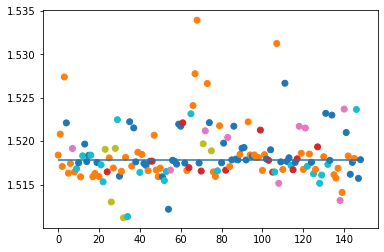

In [15]:
plt.scatter([i for i in range(149)], df[best_att], c=y, cmap=col)
plt.hlines(best_threshold, 0, 149);

In [22]:
clf = DecisionTreeClassifier(max_depth=1)
model = clf.fit(X, y)

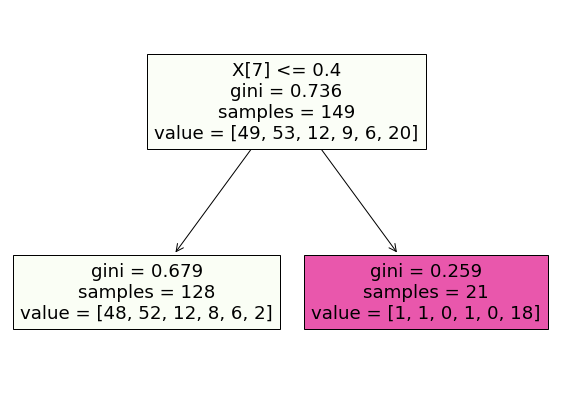

In [23]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(model, filled= True)

In [24]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35
1,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.0,0.17
2,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
3,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.0,0.00
4,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.0,0.00


In [28]:
for a in attributes:
    print(a, len(X[X[a] < 0.4]))

RI 0
Na 0
Mg 29
Al 2
Si 0
K 54
Ca 0
Ba 128
Fe 149


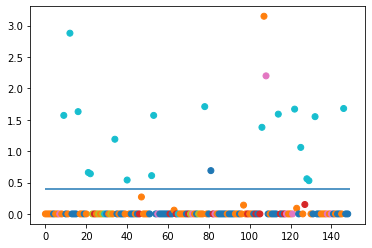

In [26]:
plt.scatter([i for i in range(149)], df['Ba'], c=y, cmap=col)
plt.hlines(0.4, 0, 149);

In [27]:
X[X['Ba'] <= 0.4]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35
1,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.0,0.17
2,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
3,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.0,0.00
4,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.0,0.00
...,...,...,...,...,...,...,...,...,...
143,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
144,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.0,0.00
145,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.0,0.15
147,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24
